Code from https://www.textbook.ds100.org/ch/05/cleaning_intro.html was not running.

Updated by Vitor Kamada
12/19/2019

In [1]:
import numpy as np
import pandas as pd
path ='https://github.com/DS-100/textbook/raw/master/content/'
calls = pd.read_csv(path + 'ch/05/data/Berkeley_PD_-_Calls_for_Service.csv')
calls.head(3)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,17091420,BURGLARY AUTO,07/23/2017 12:00:00 AM,06:00,BURGLARY - VEHICLE,0,08/29/2017 08:28:05 AM,"2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...",2500 LE CONTE AVE,Berkeley,CA
1,17020462,THEFT FROM PERSON,04/13/2017 12:00:00 AM,08:45,LARCENY,4,08/29/2017 08:28:00 AM,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA
2,17050275,BURGLARY AUTO,08/24/2017 12:00:00 AM,18:30,BURGLARY - VEHICLE,4,08/29/2017 08:28:06 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865491, ...",200 UNIVERSITY AVE,Berkeley,CA


In [2]:
from ipywidgets import interact
def df_interact(df):
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 6]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(calls)

interactive(children=(IntSlider(value=0, description='row', max=5508, step=5), IntSlider(value=0, description=…

(5508 rows, 11 columns) total


In [3]:
null_rows = calls.isnull().any(axis=1)
calls[null_rows]

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
116,17014831,BURGLARY AUTO,03/16/2017 12:00:00 AM,22:00,BURGLARY - VEHICLE,4,08/29/2017 08:27:58 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
478,17042511,BURGLARY AUTO,07/20/2017 12:00:00 AM,16:00,BURGLARY - VEHICLE,4,08/29/2017 08:28:05 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
486,17022572,VEHICLE STOLEN,04/22/2017 12:00:00 AM,21:00,MOTOR VEHICLE THEFT,6,08/29/2017 08:28:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
724,17036936,DISTURBANCE,06/26/2017 12:00:00 AM,18:24,DISORDERLY CONDUCT,1,08/29/2017 08:28:03 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1164,17034863,DISTURBANCE,06/01/2017 12:00:00 AM,00:00,DISORDERLY CONDUCT,4,08/29/2017 08:28:02 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1435,17037072,BURGLARY AUTO,06/20/2017 12:00:00 AM,08:00,BURGLARY - VEHICLE,2,08/29/2017 08:28:03 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1476,17020088,ASSAULT/BATTERY MISD.,04/11/2017 12:00:00 AM,09:25,ASSAULT,2,08/29/2017 08:27:59 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1584,17028899,ALCOHOL OFFENSE,05/21/2017 12:00:00 AM,22:00,LIQUOR LAW VIOLATION,0,08/29/2017 08:28:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2197,17091147,BURGLARY AUTO,06/14/2017 12:00:00 AM,03:00,BURGLARY - VEHICLE,3,08/29/2017 08:28:02 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2284,17030164,VEHICLE STOLEN,05/26/2017 12:00:00 AM,20:00,MOTOR VEHICLE THEFT,5,08/29/2017 08:28:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA


In [4]:
def combine_event_datetimes(calls):
    combined = pd.to_datetime(
        # Combine date and time strings
        calls['EVENTDT'].str[:10] + ' ' + calls['EVENTTM'],
        infer_datetime_format=True,)
    return calls.assign(EVENTDTTM=combined)

# To peek at the result without mutating the calls DF:
calls.pipe(combine_event_datetimes)[['EVENTDT', 'EVENTTM', 'EVENTDTTM']]

,EVENTDT,EVENTTM,EVENTDTTM
0,07/23/2017 12:00:00 AM,06:00,2017-07-23 06:00:00
1,04/13/2017 12:00:00 AM,08:45,2017-04-13 08:45:00
2,08/24/2017 12:00:00 AM,18:30,2017-08-24 18:30:00
3,04/06/2017 12:00:00 AM,17:30,2017-04-06 17:30:00
4,08/01/2017 12:00:00 AM,18:00,2017-08-01 18:00:00
...,...,...,...
5503,07/31/2017 12:00:00 AM,01:00,2017-07-31 01:00:00
5504,08/27/2017 12:00:00 AM,02:00,2017-08-27 02:00:00
5505,04/01/2017 12:00:00 AM,12:22,2017-04-01 12:22:00
5506,04/01/2017 12:00:00 AM,12:00,2017-04-01 12:00:00


In [5]:
calls['OFFENSE'].unique()

array(['BURGLARY AUTO', 'THEFT FROM PERSON', 'GUN/WEAPON',
       'VEHICLE STOLEN', 'BURGLARY RESIDENTIAL', 'VANDALISM',
       'DISTURBANCE', 'THEFT MISD. (UNDER $950)', 'THEFT FROM AUTO',
       'DOMESTIC VIOLENCE', 'THEFT FELONY (OVER $950)', 'ALCOHOL OFFENSE',
       'MISSING JUVENILE', 'ROBBERY', 'IDENTITY THEFT',
       'ASSAULT/BATTERY MISD.', '2ND RESPONSE', 'BRANDISHING',
       'MISSING ADULT', 'NARCOTICS', 'FRAUD/FORGERY',
       'ASSAULT/BATTERY FEL.', 'BURGLARY COMMERCIAL', 'MUNICIPAL CODE',
       'ARSON', 'SEXUAL ASSAULT FEL.', 'VEHICLE RECOVERED',
       'SEXUAL ASSAULT MISD.', 'KIDNAPPING', 'VICE', 'HOMICIDE'],
      dtype=object)

In [6]:
calls['CVLEGEND'].unique()

array(['BURGLARY - VEHICLE', 'LARCENY', 'WEAPONS OFFENSE',
       'MOTOR VEHICLE THEFT', 'BURGLARY - RESIDENTIAL', 'VANDALISM',
       'DISORDERLY CONDUCT', 'LARCENY - FROM VEHICLE', 'FAMILY OFFENSE',
       'LIQUOR LAW VIOLATION', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'ASSAULT', 'NOISE VIOLATION', 'DRUG VIOLATION',
       'BURGLARY - COMMERCIAL', 'ALL OTHER OFFENSES', 'ARSON',
       'SEX CRIME', 'RECOVERED VEHICLE', 'KIDNAPPING', 'HOMICIDE'],
      dtype=object)

In [7]:
calls['BLKADDR'][[0, 5001]]

0            2500 LE CONTE AVE
5001    ALLSTON WAY & FIFTH ST
Name: BLKADDR, dtype: object

In [8]:
def split_lat_lon(calls):
    return calls.join(
        calls['Block_Location']
        # Get coords from string
        .str.split('\n').str[2]
        # Remove parens from coords
        .str[1:-1]
        # Split latitude and longitude
        .str.split(', ', expand=True)
        .rename(columns={0: 'Latitude', 1: 'Longitude'}))
    
calls.pipe(split_lat_lon).head(2)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Latitude,Longitude
0,17091420,BURGLARY AUTO,07/23/2017 12:00:00 AM,06:00,BURGLARY - VEHICLE,0,08/29/2017 08:28:05 AM,"2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...",2500 LE CONTE AVE,Berkeley,CA,37.876965,-122.260544
1,17020462,THEFT FROM PERSON,04/13/2017 12:00:00 AM,08:45,LARCENY,4,08/29/2017 08:28:00 AM,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA,37.869363,-122.268028


In [9]:
day_of_week = pd.read_csv(path + 'ch/05/data/cvdow.csv')
day_of_week

,CVDOW,Day
0,0,Sunday
1,1,Monday
2,2,Tuesday
3,3,Wednesday
4,4,Thursday
5,5,Friday
6,6,Saturday


In [10]:
def match_weekday(calls):
    return calls.merge(day_of_week, on='CVDOW')
calls.pipe(match_weekday).head(2)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day
0,17091420,BURGLARY AUTO,07/23/2017 12:00:00 AM,06:00,BURGLARY - VEHICLE,0,08/29/2017 08:28:05 AM,"2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...",2500 LE CONTE AVE,Berkeley,CA,Sunday
1,17038302,BURGLARY AUTO,07/02/2017 12:00:00 AM,22:00,BURGLARY - VEHICLE,0,08/29/2017 08:28:03 AM,"BOWDITCH STREET &amp; CHANNING WAY\nBerkeley, ...",BOWDITCH STREET & CHANNING WAY,Berkeley,CA,Sunday


In [11]:
def drop_unneeded_cols(calls):
    return calls.drop(columns=['CVDOW', 'InDbDate', 'Block_Location',
       'City','State', 'EVENTDT', 'EVENTTM'])
calls_final = (calls.pipe(combine_event_datetimes).pipe(split_lat_lon)
  .pipe(match_weekday).pipe(drop_unneeded_cols)) 
df_interact(calls_final)    

interactive(children=(IntSlider(value=0, description='row', max=5508, step=5), IntSlider(value=0, description=…

(5508 rows, 8 columns) total


In [12]:
calls_final['EVENTDTTM'].dt.date.sort_values()

1384    2017-03-02
1264    2017-03-02
1408    2017-03-02
1032    2017-03-02
1277    2017-03-02
           ...    
256     2017-08-27
544     2017-08-27
3516    2017-08-28
3409    2017-08-28
3631    2017-08-28
Name: EVENTDTTM, Length: 5508, dtype: object

In [13]:
(calls_final['EVENTDTTM'].dt.date.max() - 
  calls_final['EVENTDTTM'].dt.date.min())

datetime.timedelta(179)

In [14]:
import folium # Use the Folium Javascript Map Library
import folium.plugins
SF_COORDINATES = (37.87, -122.28)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = calls_final[['Latitude', 
          'Longitude']].dropna().astype('float').as_matrix()
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
sf_map.add_child(heatmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


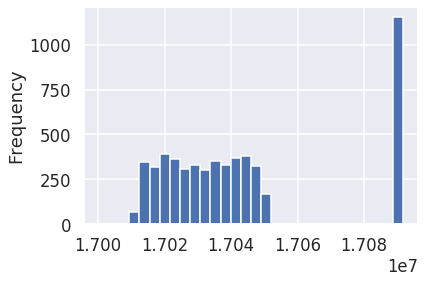

In [15]:
import seaborn as sns
sns.set()
sns.set_context('talk')
calls_final['CASENO'].plot.hist(bins=30)